# Explore of Boston 311 Non-emergency data 2015

## Table of content
### 1. Introduction 
### 2. Exploratory analysis
#### 2.1 Import data
#### 2.2 Create pivotal table
#### 2.3 Descriptive analysis
#### 2.4 Calling SUBJECT 
#### 2.5 Calling REASONS data
#### 2.6 Calling TYPE 
#### 2.7 Calling Sources
#### 2.8 Section conslution
### 3. Ontime and Overdue analysis
### Cross year analysis
### Comparison of different cities
### Conclusion

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, date, time
plt.style.use('ggplot') # Look Pretty

In [2]:
yiwu =pd.read_csv('/Users/haoyuzhao/Google Drive/311__2015-2016.csv', index_col='OPEN_DT', parse_dates=True)
yiwu2=yiwu.drop(['CASE_ENQUIRY_ID', 'TARGET_DT', 'CLOSED_DT',
       'CASE_STATUS', 'CLOSURE_REASON', 'CASE_TITLE', 'QUEUE', 'Department', 
       'SubmittedPhoto', 'ClosedPhoto',
       'Location', 'fire_district', 'pwd_district', 'city_council_district',
       'police_district','ward', 'precinct', 'land_usage', 'LOCATION_STREET_NAME',
       'Property_Type', 'Property_ID', 'LATITUDE',
       'LONGITUDE', 'Geocoded_Location'],axis=1)
yiwu2=yiwu2.sort_index(ascending=True)
yiwu201=yiwu2.reset_index()
yiwu202=yiwu201.reset_index()

/Users/haoyuzhao/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (23) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
#  list comprehension get week number# 
list = [ datetime.date(datee).isocalendar()[1] for datee in yiwu202['OPEN_DT']]
yiwu202['week']=list

In [4]:
# pivot table #
yiwu202['case']=1

yiwu_SUBJECT = yiwu202.pivot_table(index='week',
                                  values='case',
                                  columns='SUBJECT',
                                  aggfunc='count') 
yiwu_REASON = yiwu202.pivot_table(index='week',
                                  values='case',
                                  columns='REASON',
                                  aggfunc='count') 

yiwu_SUBJECT2 = yiwu202.pivot_table(index='week',
                                  values='case',
                                  columns=['SUBJECT','REASON'],
                                  aggfunc='count') 

yiwu_SOURCE = yiwu202.pivot_table(index='week',
                                  values='case',
                                  columns=['Source'],
                                  aggfunc='count')
                                 
yiwu_neighbor = yiwu202.pivot_table(index='week',
                                  values='case',
                                  columns=['neighborhood'],
                                  aggfunc='count')

yiwu_REASON.describe()

REASON,Abandoned Bicycle,Administration,Administrative & General Requests,Air Pollution Control,Alert Boston,Animal Issues,Billing,Boston Bikes,Bridge Maintenance,Building,...,Sanitation,Sidewalk Cover / Manhole,Signs & Signals,Street Cleaning,Street Lights,Traffic Management & Engineering,Trees,Valet,Water Issues,Weights and Measures
count,45.000000,8.000000,53.000000,3.0,4.0,53.000000,6.000000,33.000000,6.000000,53.000000,...,53.000000,52.000000,53.000000,53.000000,53.000000,52.000000,53.000000,3.000000,43.000000,36.000000
mean,9.888889,3.875000,44.169811,1.0,1.5,5.547170,1.166667,2.000000,1.166667,201.584906,...,650.698113,5.288462,196.377358,964.339623,170.584906,9.384615,84.037736,1.333333,1.976744,1.722222
std,7.894826,1.552648,69.516942,0.0,1.0,4.745711,0.408248,1.414214,0.408248,93.551186,...,242.915907,3.182899,59.331606,1659.940476,55.317418,6.107385,70.320957,0.577350,1.164727,1.003170
min,1.000000,1.000000,4.000000,1.0,1.0,1.000000,1.000000,1.000000,1.000000,13.000000,...,194.000000,1.000000,13.000000,242.000000,22.000000,1.000000,4.000000,1.000000,1.000000,1.000000
25%,4.000000,3.000000,19.000000,1.0,1.0,3.000000,1.000000,1.000000,1.000000,115.000000,...,543.000000,2.750000,169.000000,389.000000,139.000000,5.000000,30.000000,1.000000,1.000000,1.000000
50%,8.000000,4.000000,26.000000,1.0,1.0,4.000000,1.000000,1.000000,1.000000,219.000000,...,620.000000,5.000000,198.000000,434.000000,175.000000,9.000000,70.000000,1.000000,2.000000,1.000000
75%,13.000000,5.000000,34.000000,1.0,1.5,7.000000,1.000000,2.000000,1.000000,268.000000,...,718.000000,7.000000,228.000000,504.000000,204.000000,11.250000,117.000000,1.500000,3.000000,2.000000
max,32.000000,6.000000,338.000000,1.0,3.0,27.000000,2.000000,7.000000,2.000000,431.000000,...,1717.000000,14.000000,293.000000,6932.000000,302.000000,31.000000,332.000000,2.000000,5.000000,5.000000


The most frequent calling subject is from public work department.

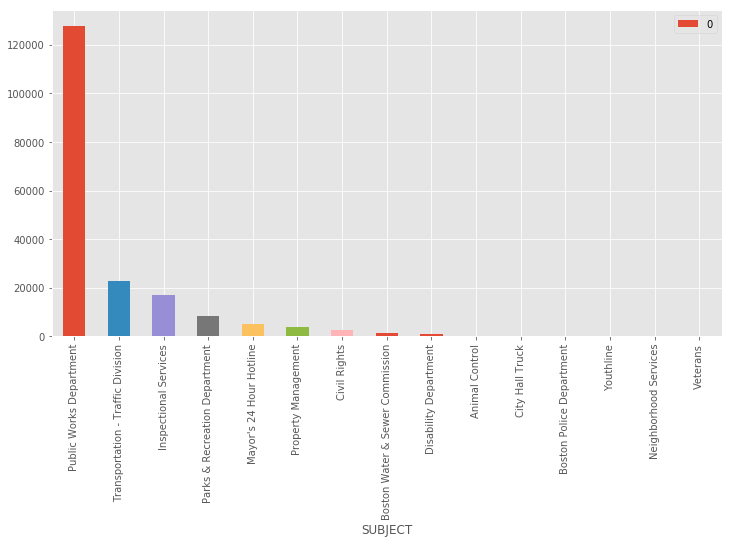

In [5]:
## 311 calling subject graph results 
subject_total=yiwu_SUBJECT.sum(axis=0).sort_values(ascending=False)
subject_total.reset_index().plot(kind='bar',x='SUBJECT',y=0,figsize=(12, 6))
plt.show()

The variation of public work department across the whole year is displayed. 
It peaks in winter time.

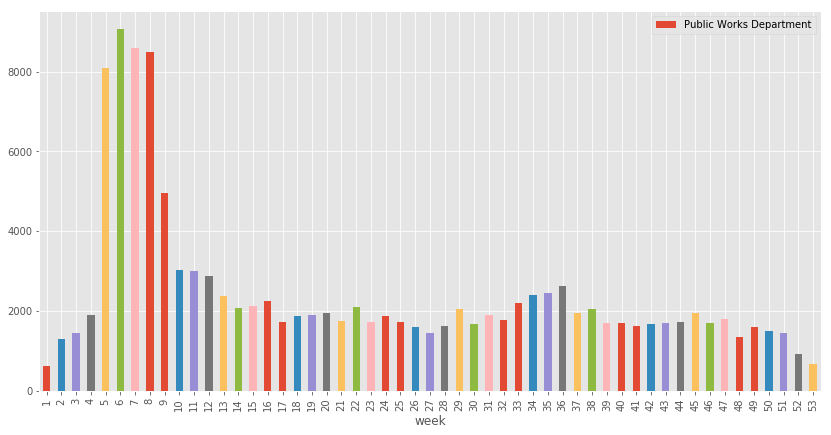

In [6]:
# select some column
pub_work=yiwu_SUBJECT.columns[-4]
Trans_Inspec=yiwu_SUBJECT.columns[[-3,-9]]
yiwu_SUBJECT.plot(x=yiwu_SUBJECT.index,y=pub_work, kind='bar',figsize=(14, 7))
plt.show()

Inspectional services requested are especially high in the winter.

/Users/haoyuzhao/anaconda3/lib/python3.6/site-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


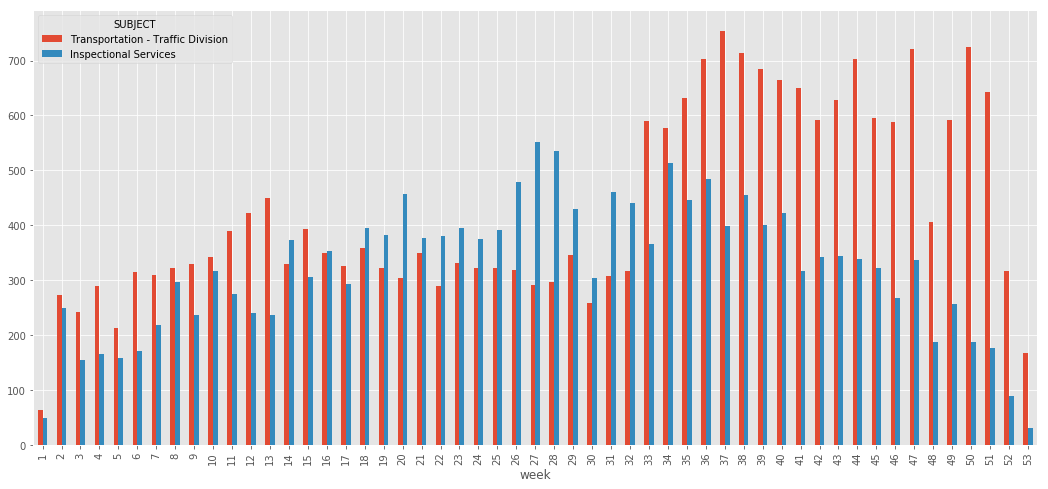

In [7]:
yiwu_SUBJECT.plot(x=yiwu_SUBJECT.index,y=Trans_Inspec, kind='bar',figsize=(18, 8))
plt.show()

/Users/haoyuzhao/anaconda3/lib/python3.6/site-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


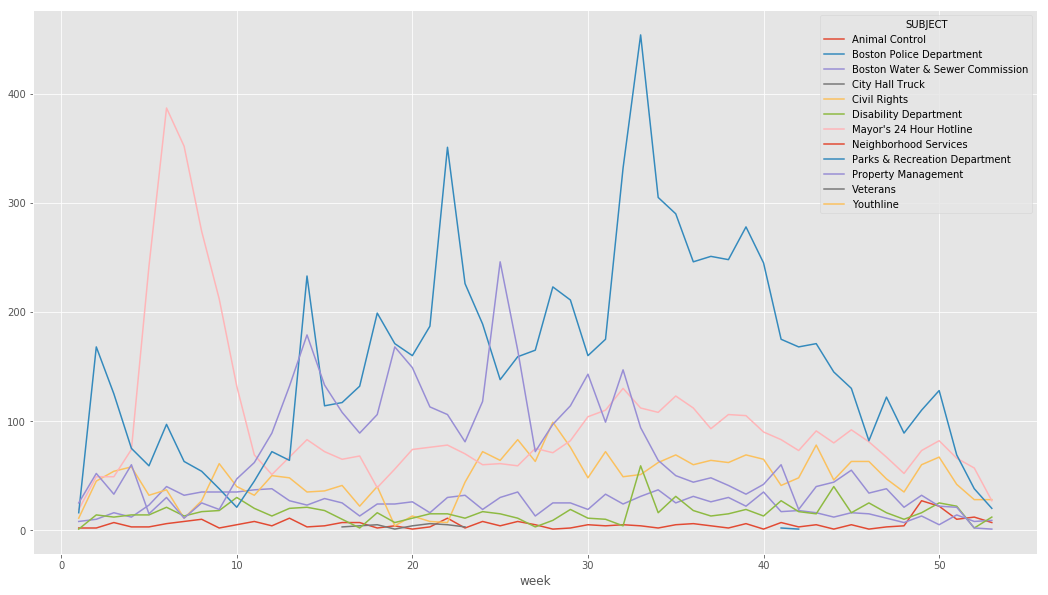

In [8]:
yiwu_SUBJECT.plot(x=yiwu_SUBJECT.index,y=['Animal Control', 'Boston Police Department',
       'Boston Water & Sewer Commission', 'City Hall Truck', 'Civil Rights',
       'Disability Department',
       "Mayor's 24 Hour Hotline", 'Neighborhood Services',
       'Parks & Recreation Department', 'Property Management',
               'Veterans', 'Youthline'], kind='line',figsize=(18, 10))
plt.show()

Most frequent requested call case is streat cleaning. This request largely increased in the winter time.

/Users/haoyuzhao/anaconda3/lib/python3.6/site-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


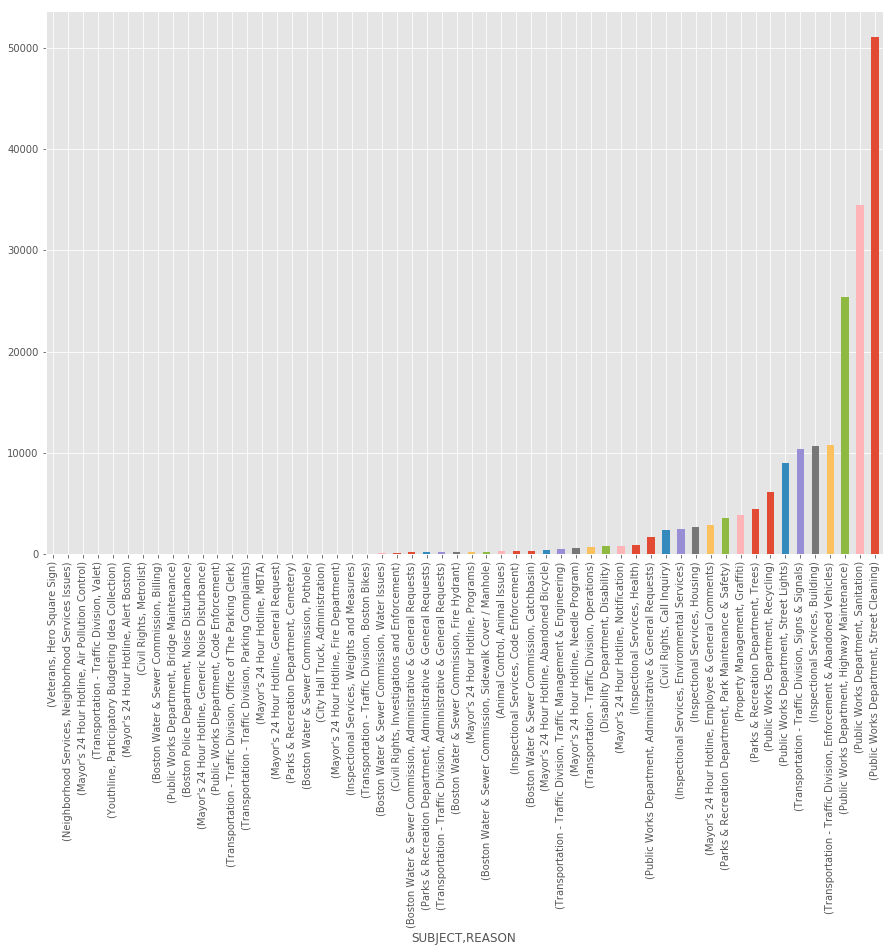

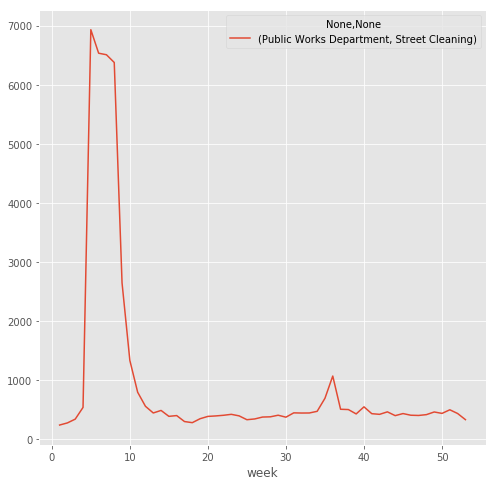

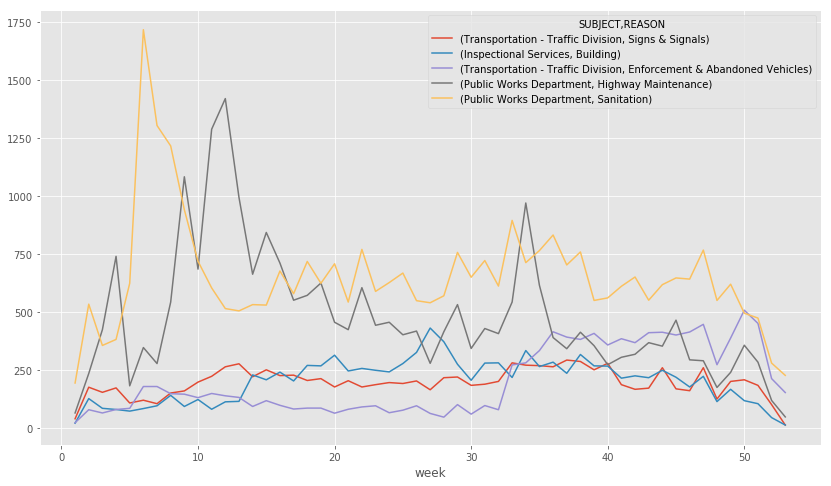

In [9]:
## 311 calling subject+reason graph
sub_rea_total=yiwu_SUBJECT2.sum(axis=0)
sub_rea_total=sub_rea_total.sort_values(ascending=True)
sub_rea_total.plot(kind='bar',use_index=True,figsize=(15, 10))
yiwu_SUBJECT2.plot(use_index=True,y=sub_rea_total.index[-1], kind='line',figsize=(8, 8))
yiwu_SUBJECT2.plot(use_index=True,y=sub_rea_total.index[-6:-1], kind='line',figsize=(14, 8))
plt.show()

/Users/haoyuzhao/anaconda3/lib/python3.6/site-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


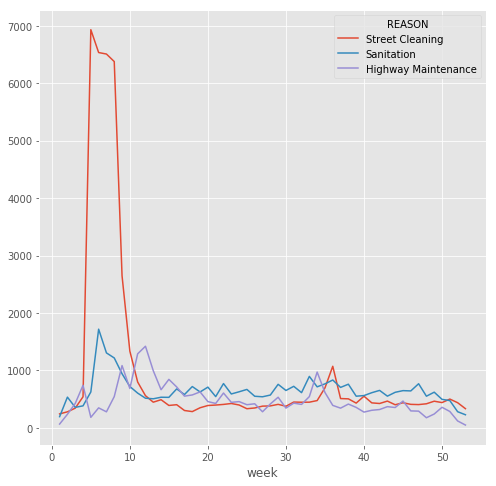

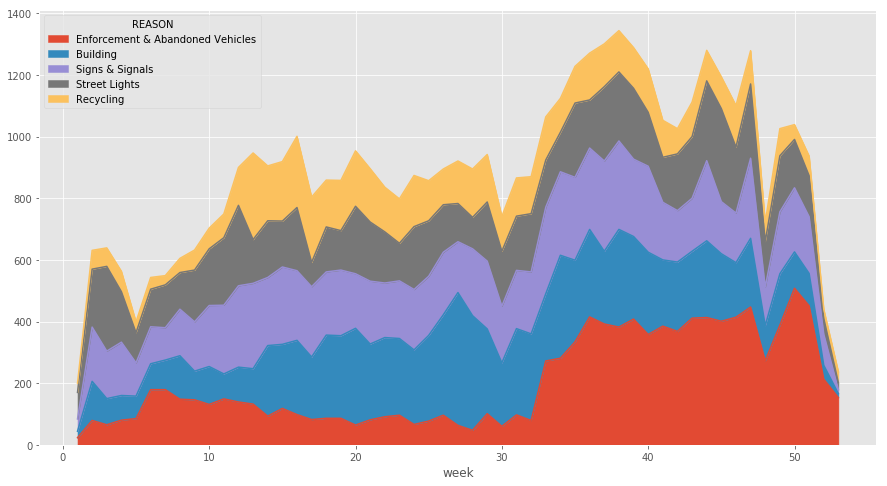

In [10]:
## 311 calling reason graph results  
reason_total=yiwu_REASON.sum(axis=0)
reason_total=reason_total.sort_values(ascending=False)
yiwu_REASON.plot(use_index=True,y=reason_total.index[:3], kind='line',figsize=(8, 8))
yiwu_REASON.plot(use_index=True,y=reason_total.index[3:8], kind='area',figsize=(15, 8))
plt.show()

/Users/haoyuzhao/anaconda3/lib/python3.6/site-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


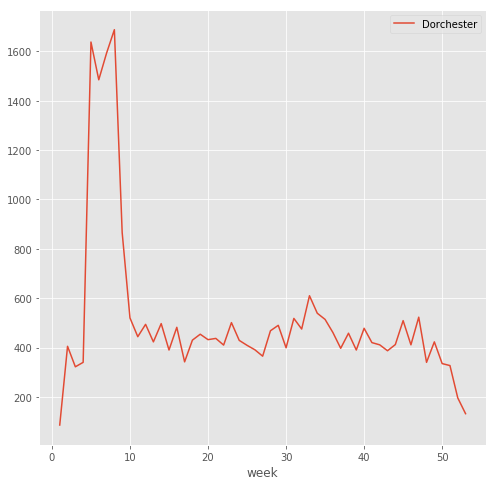

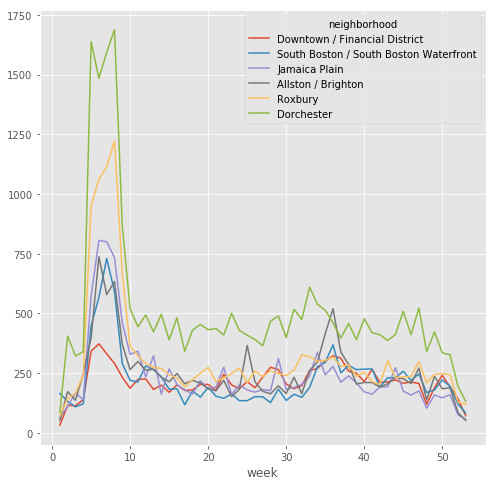

In [11]:
## 311 calling neighborhoods graph results  
neighbor_total=yiwu_neighbor.sum(axis=0)
neighbor_total=neighbor_total.sort_values(ascending=True)
# total number cases indicate that feb and march are most busy month
yiwu_neighbor.plot(use_index=True,y=neighbor_total.index[-1], kind='line',figsize=(8, 8))
# 6 neighborhoods with most cases in 2015
yiwu_neighbor.plot(use_index=True,y=neighbor_total.index[-6:], kind='line',figsize=(8, 8))
plt.show()

The 

/Users/haoyuzhao/anaconda3/lib/python3.6/site-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


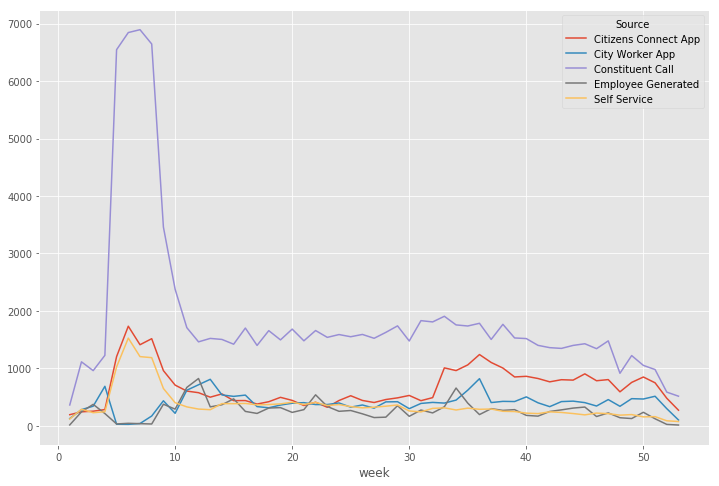

In [15]:
## 311 calling source graph results 
yiwu_SOURCE.plot(x=yiwu_SOURCE.index,y=['Citizens Connect App', 'City Worker App',
       'Constituent Call', 'Employee Generated','Self Service'], kind='line',figsize=(12, 8))
plt.show()


the calling volume from App jumps in the summer.
the calling volume from call remain relatively consistent throughout the year. 



/Users/haoyuzhao/anaconda3/lib/python3.6/site-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


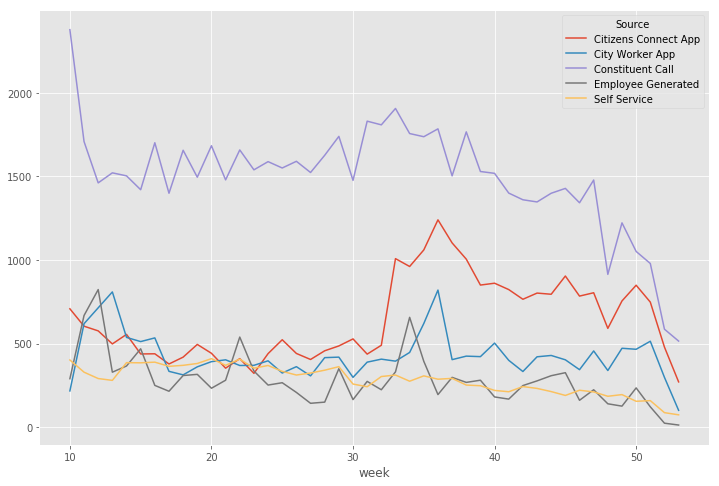

In [16]:
# plot exclude first 9 weeks
yiwu_SOURCE.iloc[9:].plot(x=yiwu_SOURCE.iloc[9:].index,y=['Citizens Connect App', 'City Worker App',
       'Constituent Call', 'Employee Generated','Self Service'], kind='line',figsize=(12, 8))
plt.show()

The area plot demonstrate the proportion of different calling sources are consistent across different weeks.
The pie plot demonstrate the total quantity proportions of sources.

# area plot to show user volume from different reporing sources
yiwu_SOURCE.plot(use_index=True,y=['Citizens Connect App', 'City Worker App',
       'Constituent Call', 'Employee Generated','Self Service'], kind='area')

plt.show()

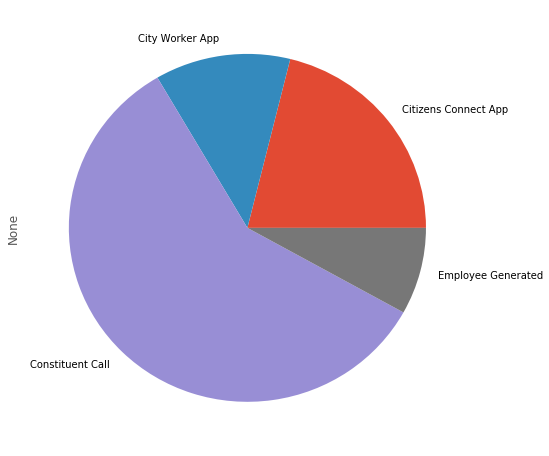

In [18]:
# pie plot
source_total=yiwu_SOURCE.sum(axis=0)
source_total[:4].plot.pie(figsize=(8, 8))
plt.show()

### 3. Ontime and Overdue analysis
TARGET_DT demonstrate when does the city of Boston expect the case to close. 

3.1 calculate which case are late and which case are on time.

In [19]:
# import data # 
yiwu3=yiwu.drop(['CASE_ENQUIRY_ID','CLOSURE_REASON', 'CASE_TITLE', 'QUEUE', 'Department', 
       'SubmittedPhoto', 'ClosedPhoto','Location', 'fire_district',
       'pwd_district', 'city_council_district',
       'police_district','ward', 'precinct', 'land_usage', 'LOCATION_STREET_NAME',
       'Property_Type', 'Property_ID', 'Geocoded_Location'],axis=1)

yiwu3=yiwu3.sort_index(ascending=True)
yiwu301=yiwu3.reset_index()

In [23]:
## calculate duration and days 
yiwu301['OPEN_DT']=pd.to_datetime(yiwu301['OPEN_DT'])
yiwu301['CLOSED_DT']=pd.to_datetime(yiwu301['CLOSED_DT'])
yiwu301['Duration']=yiwu301['CLOSED_DT']-yiwu301['OPEN_DT']
yiwu301['SOLVE_DAY']=yiwu301['Duration'].dt.days


descriptive analysis of case solve durations: most cases are solved within the same day. 
However some cases are remain unsolved for more than a hundred days.

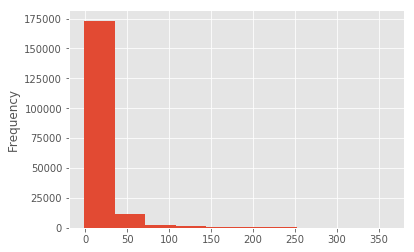

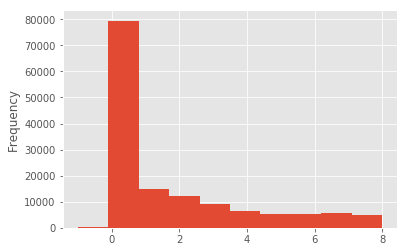

In [32]:
# plot histogram of case solve duration
yiwu301['SOLVE_DAY'].plot.hist()
plt.show()
yiwu301[yiwu301['SOLVE_DAY']<=8]['SOLVE_DAY'].plot.hist()
plt.show()

In [34]:
yiwu302=yiwu301.drop(['CASE_STATUS','neighborhood_services_district'],axis=1) 

In [35]:
### calculate late cases by mark out cases tht have a close date later than its target date
yiwu302=yiwu302.dropna()
yiwu302['CLOSED_DT']=pd.to_datetime(yiwu302['CLOSED_DT'])
yiwu302['TARGET_DT']=pd.to_datetime(yiwu302['TARGET_DT'])
yiwu302['LATE']=yiwu302['CLOSED_DT']>yiwu302['TARGET_DT']

We find that the results of generated case status 'LATE' is equal to 'OnTime_Status'. 

In [36]:
# check whether the generated "late" equals to 'Ontime_Status'
delay_case=yiwu302.groupby("LATE").agg([len]) # same thing
delay_case2=yiwu302.groupby("OnTime_Status").count() # self created LATE equals to ontime status

Start to perform ontime and overdue analysis.

In [37]:
### 311 ontime analysis: generate two relevent datasets ###
yiwu304_ontime=yiwu302[yiwu302['OnTime_Status']=='ONTIME'] 
yiwu304_overdue=yiwu302[yiwu302['OnTime_Status']=='OVERDUE'] 

Sanitation ranked top 1 in all categoreis of on-time cases 

In [44]:
## ontime cases
ontime_case=yiwu304_ontime.groupby(['SUBJECT','REASON']).count()
ontime_case2=yiwu304_ontime.groupby(['SUBJECT','REASON','TYPE']).count()
ontime_case2=ontime_case2.reset_index()
ontime_case2=ontime_case2.sort_values(by='CLOSED_DT',ascending=False)
ontime_case2.head()

,SUBJECT,REASON,TYPE,OPEN_DT,TARGET_DT,CLOSED_DT,OnTime_Status,neighborhood,LOCATION_ZIPCODE,LATITUDE,LONGITUDE,Source,Duration,SOLVE_DAY,LATE
105,Public Works Department,Sanitation,Missed Trash/Recycling/Yard Waste/Bulk Item,14546,14546,14546,14546,14546,14546,14546,14546,14546,14546,14546,14546
111,Public Works Department,Street Cleaning,Requests for Street Cleaning,8320,8320,8320,8320,8320,8320,8320,8320,8320,8320,8320,8320
110,Public Works Department,Street Cleaning,Request for Snow Plowing,6420,6420,6420,6420,6420,6420,6420,6420,6420,6420,6420,6420
121,Transportation - Traffic Division,Enforcement & Abandoned Vehicles,Parking Enforcement,5723,5723,5723,5723,5723,5723,5723,5723,5723,5723,5723,5723
107,Public Works Department,Street Cleaning,CE Collection,3978,3978,3978,3978,3978,3978,3978,3978,3978,3978,3978,3978


/Users/haoyuzhao/anaconda3/lib/python3.6/site-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


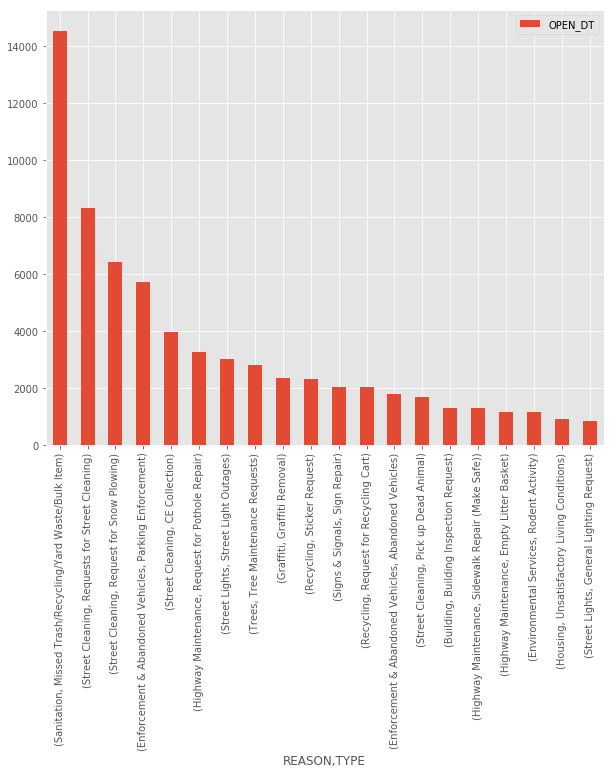

In [41]:
ontime_case2.iloc[:20,:].plot(x=['REASON','TYPE'],y=['OPEN_DT'],kind='bar',figsize=(10,8))
plt.show()

In [52]:
## overdue cases
over_case=yiwu304_overdue.groupby(['SUBJECT','REASON']).count()
over_case.to_csv('over_case.csv')
over_case2=yiwu304_overdue.groupby(['SUBJECT','REASON','TYPE']).count()
over_case2.to_csv('over_case2.csv')
over_case2=over_case2.reset_index()
over_case2=over_case2.sort_values(by='CLOSED_DT',ascending=False)
over_case2.iloc[1:20,:].plot(x=['REASON','TYPE'],y=['OPEN_DT'],kind='bar',figsize=(10,8))
over_case2.loc['Public Works Department','Street Cleaning']
over_case2.plot(use_index=True,y='OPEN_DT', kind='bar',figsize=(15, 8))

/Users/haoyuzhao/anaconda3/lib/python3.6/site-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


KeyError: 'the label [Public Works Department] is not in the [index]'


We select all cases that do not have a close date to understand why these cases do not have a close date.  

In [ ]:
## NA cases analysis ## --yiwu303--all na cases of target_dt
yiwu303=yiwu301[yiwu301['TARGET_DT'].isnull()] 